In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(-0.5, 2047.5, 1535.5, -0.5)

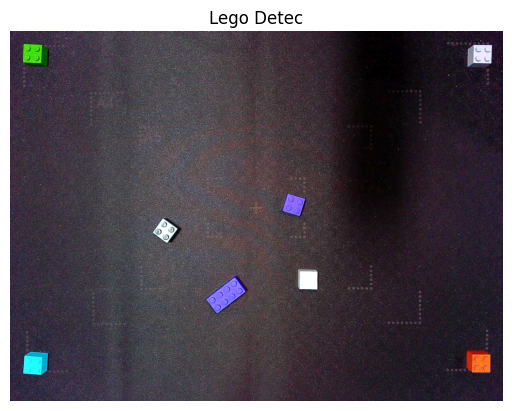

In [38]:
# Bild laden
# image = cv2.imread('../images/legos.jpg')
# cv2.imread('./Templates/erster_test_template.jpg')
# image =  cv2.imread('../images/picture_with_hand.jpg')
image = cv2.imread('../images/legos_in_der_ecke.jpg')

plt.imshow(image, cmap='gray')
plt.title('Lego Detec')
plt.axis('off')

(-0.5, 2047.5, 1535.5, -0.5)

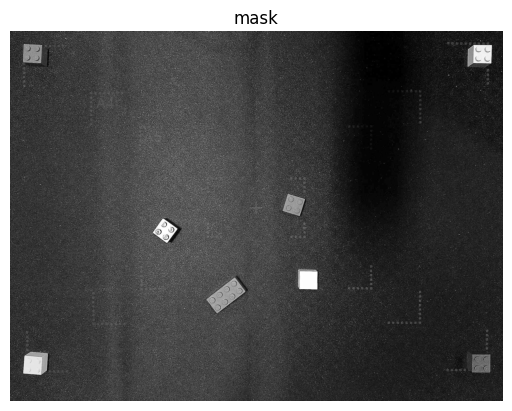

In [39]:
mask = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.axis('off')

(-0.5, 2047.5, 1535.5, -0.5)

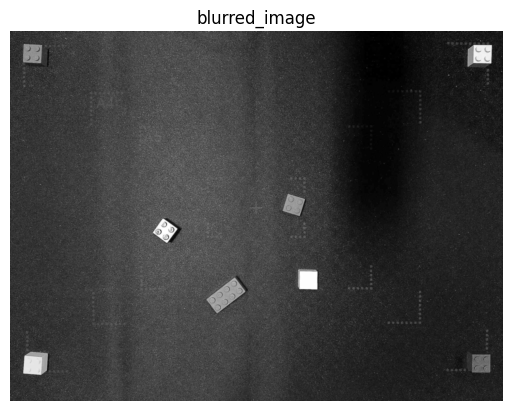

In [40]:
blurred_image = cv2.GaussianBlur(mask, (5, 5), 0)
plt.imshow(blurred_image, cmap='gray')
plt.title('blurred_image')
plt.axis('off')

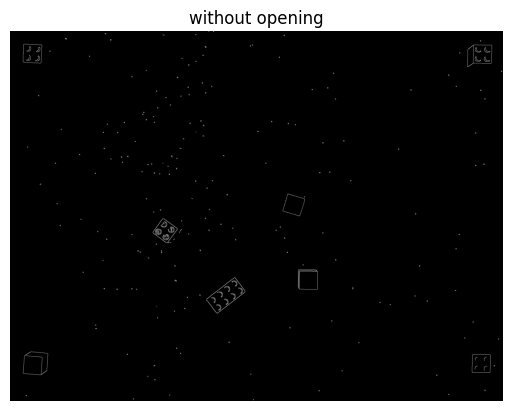

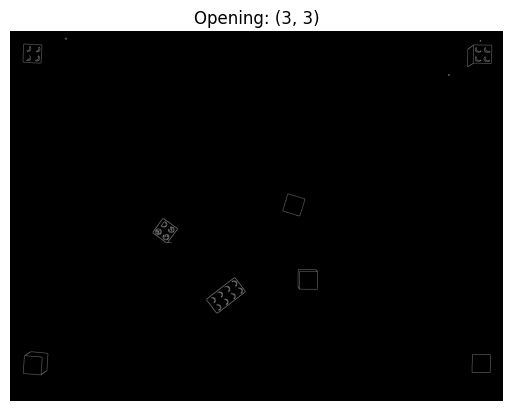

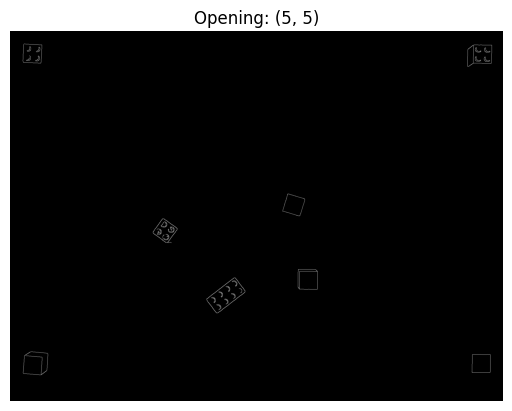

Anzahl der Konturen: 8


In [41]:
kernelSizes = [(3, 3), (5, 5)]
# loop over the kernels sizes
cannyWithoutOpening = cv2.Canny(blurred_image,150,300)
plt.imshow(cannyWithoutOpening, cmap='gray')
plt.title('without opening')
plt.axis('off')
plt.show()
for kernelSize in kernelSizes:
	# construct a rectangular kernel from the current size and then
	# apply an "opening" operation
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	opening = cv2.morphologyEx(blurred_image, cv2.MORPH_OPEN, kernel)
	edges = cv2.Canny(opening, 150, 300)
	plt.imshow(edges, cmap='gray')
	plt.title("Opening: ({}, {})".format(
		kernelSize[0], kernelSize[1]))
	plt.axis('off')
	plt.show()


# Kantenerkennung


# plt.imshow(edges, cmap='gray')
# plt.title('edges')
# plt.axis('off')
# Konturfindung
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Anzahl der Konturen:", len(contours))

Fläche 5625.5
Umfang 304.87005722522736
Kompaktheit 1.3147965369452406

Fläche 8551.5
Umfang 363.4385987520218
Kompaktheit 1.2291642903858608

Fläche 11302.5
Umfang 462.6244522333145
Kompaktheit 1.5068595956559192

Fläche 6615.0
Umfang 318.2842707633972
Kompaktheit 1.2186826860404734

Fläche 5651.0
Umfang 344.0731556415558
Kompaktheit 1.6671182656055654

Fläche 7542.0
Umfang 362.2253956794739
Kompaktheit 1.3843993888737427

Fläche 5773.0
Umfang 306.2842707633972
Kompaktheit 1.2931174335797022



(-0.5, 2047.5, 1535.5, -0.5)

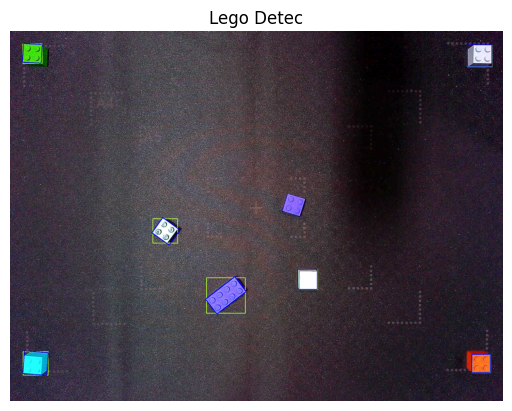

In [42]:
# Objekterkennung und Markierung
for contour in contours:
    moments = cv2.moments(contour)

    centroidX = int(moments['m10']/moments['m00'])
    centroidY = int(moments['m01']/moments['m00'])
 
    

    area = cv2.contourArea(contour)
    perimter =  cv2.arcLength(contour, True)
    compactness = (perimter**2) / (4 * np.pi * area)
    
    if area > 100 and ((4/np.pi)*0.50) <= compactness <= (((4/np.pi)*1.50)):  # Beispielgrenze für die Mindestgröße der Kontur  
        print('Fläche', area)
        print('Umfang', perimter)
        print('Kompaktheit', compactness)
        print('')         
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (180, 255, 50), 2)

        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        cv2.drawContours(image,[box],0,(0,0,255),2)

cv2.imshow('bild', cv2.resize(image,None, fx= 0.5, fy= 0.5, interpolation= cv2.INTER_LINEAR))
while True:
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    break;

# Bild anzeigen
plt.imshow(image, cmap='gray')
plt.title('Lego Detec')
plt.axis('off')
